# Reddit NLP Classification Analysis

## Part II: Data Cleaning & Exploratory Analysis

<img src='./images/pysql.png'>

<font color=white>.</font>

run me! ↓

In [318]:
# css notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<font color=white>.</font>

#### Executive summary

The goal of this analysis is to classify text posts as either belonging to one subreddit or another, using NLP. 

Success will be evaluated using the model's accuracy score in correctly classifying the posts, with a second goal of trying many models to obtain the highest accuracy score possible.

#### Research Questions

* What preprocessing steps are best for creating a classification model with high accuracy?
* Which classification models and hyperparameters lead to the highest accuracy score?

<font color=white>.</font>

#### imports

In [250]:
import pandas as pd
import numpy as np
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
learnsql = pd.read_csv('./data/learnsql2.csv', index_col=[0])
learnpy = pd.read_csv('./data/learnpython2.csv', index_col=[0])

<font color=white>.</font>

## Data Cleaning

In [252]:
learnpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  3396 non-null   object 
 1   created_utc             3396 non-null   int64  
 2   id                      3396 non-null   object 
 3   is_created_from_ads_ui  1098 non-null   object 
 4   num_comments            3396 non-null   int64  
 5   score                   3396 non-null   int64  
 6   selftext                3372 non-null   object 
 7   subreddit               3396 non-null   object 
 8   title                   3396 non-null   object 
 9   total_awards_received   3396 non-null   int64  
 10  upvote_ratio            2398 non-null   float64
 11  url                     3396 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 344.9+ KB


In [253]:
learnsql.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  3407 non-null   object 
 1   created_utc             3407 non-null   int64  
 2   id                      3407 non-null   object 
 3   is_created_from_ads_ui  1030 non-null   object 
 4   num_comments            3407 non-null   int64  
 5   score                   3407 non-null   int64  
 6   selftext                2751 non-null   object 
 7   subreddit               3407 non-null   object 
 8   title                   3407 non-null   object 
 9   total_awards_received   2580 non-null   float64
 10  upvote_ratio            1999 non-null   float64
 11  url                     3407 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 346.0+ KB


<font color=white>.</font>

In [254]:
learnpy.set_index('id')
learnsql.set_index('id');

<font color=white>.</font>

#### Checking duplicates

In [255]:
# Filter for duplicate rows and remove them, if there are any 
print(learnsql['url'].duplicated())
learnsql['dupe'] = learnsql['url'].duplicated() 
learnsql=learnsql[learnsql['dupe']!=True].drop(columns='dupe')
learnsql.info()

0     False
1     False
2     False
3     False
4     False
      ...  
6     False
7     False
8     False
9     False
10    False
Name: url, Length: 3407, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  3375 non-null   object 
 1   created_utc             3375 non-null   int64  
 2   id                      3375 non-null   object 
 3   is_created_from_ads_ui  1020 non-null   object 
 4   num_comments            3375 non-null   int64  
 5   score                   3375 non-null   int64  
 6   selftext                2751 non-null   object 
 7   subreddit               3375 non-null   object 
 8   title                   3375 non-null   object 
 9   total_awards_received   2551 non-null   float64
 10  upvote_ratio            1977 non-null   float64
 11  url                     3375 non

In [256]:
learnpy['dupe'] = learnpy['url'].duplicated().unique #no duplicate rows in data
learnpy=learnpy[learnpy['dupe']!=True].drop(columns='dupe')
learnpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  3396 non-null   object 
 1   created_utc             3396 non-null   int64  
 2   id                      3396 non-null   object 
 3   is_created_from_ads_ui  1098 non-null   object 
 4   num_comments            3396 non-null   int64  
 5   score                   3396 non-null   int64  
 6   selftext                3372 non-null   object 
 7   subreddit               3396 non-null   object 
 8   title                   3396 non-null   object 
 9   total_awards_received   3396 non-null   int64  
 10  upvote_ratio            2398 non-null   float64
 11  url                     3396 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 344.9+ KB


<font color=white>.</font>

#### Checking datatypes

In [257]:
learnsql.dtypes

author                     object
created_utc                 int64
id                         object
is_created_from_ads_ui     object
num_comments                int64
score                       int64
selftext                   object
subreddit                  object
title                      object
total_awards_received     float64
upvote_ratio              float64
url                        object
dtype: object

In [258]:
learnpy.dtypes

author                     object
created_utc                 int64
id                         object
is_created_from_ads_ui     object
num_comments                int64
score                       int64
selftext                   object
subreddit                  object
title                      object
total_awards_received       int64
upvote_ratio              float64
url                        object
dtype: object

<font color=white>.</font>

#### Checking nulls

In [259]:
learnsql.isna().sum()

author                       0
created_utc                  0
id                           0
is_created_from_ads_ui    2355
num_comments                 0
score                        0
selftext                   624
subreddit                    0
title                        0
total_awards_received      824
upvote_ratio              1398
url                          0
dtype: int64

In [260]:
learnpy.isna().sum()

author                       0
created_utc                  0
id                           0
is_created_from_ads_ui    2298
num_comments                 0
score                        0
selftext                    24
subreddit                    0
title                        0
total_awards_received        0
upvote_ratio               998
url                          0
dtype: int64

<font color=white>.</font>

After looking through the NaNs in the python dta, it appears there are no ads, so I'm dropping this column.

In [261]:
learnsql['is_created_from_ads_ui'].unique()
learnpy['is_created_from_ads_ui'].unique()

learnsql=learnsql.drop(columns='is_created_from_ads_ui')
learnpy=learnpy.drop(columns='is_created_from_ads_ui')

In [262]:
learnpy[learnpy['total_awards_received'].isna()]

,author,created_utc,id,num_comments,score,selftext,subreddit,title,total_awards_received,upvote_ratio,url


<font color=white>.</font>

Since I will be concatenating selftext and title for analysis, I chose not to drop nulls in the selftext column. Instead I filled NAs with a space.

In [263]:
learnpy['selftext']=learnpy['selftext'].fillna(' ')
learnsql['selftext']=learnsql['selftext'].fillna(' ')

In [264]:
learnsql.isna().sum()

author                      0
created_utc                 0
id                          0
num_comments                0
score                       0
selftext                    0
subreddit                   0
title                       0
total_awards_received     824
upvote_ratio             1398
url                         0
dtype: int64

<font color=white>.</font>

Total awards recieved and update ratio are columns I pulled in for fun and don't really need to use for NLP, so I'm not too concerned about nulls.
Most posts that don't get a lot of attention will have an upvote ratio of 1, since every post gets one automated upvote on behalf of the OP.
Q2, Q3, Q4, mean, and max all being 1 reflect this. 

I imputed all null values with 1 for this column.

In [265]:
learnpy['upvote_ratio'].describe()

count    2398.000000
mean        0.981130
std         0.085478
min         0.200000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: upvote_ratio, dtype: float64

In [266]:
learnpy['upvote_ratio'] = learnpy['upvote_ratio'].fillna(1)
learnsql['upvote_ratio'] = learnsql['upvote_ratio'].fillna(1)

<font color=white>.</font>

My total_rewards_received column isn't doing great: I only have record of 4 posts getting awarded.
Since I pulled data from up to 50 months ago, I think there should be more awards in the dataset. I dropped this column.

In [267]:
learnpy[learnpy['total_awards_received']>0]
learnpy = learnpy.drop(columns='total_awards_received')
learnsql = learnsql.drop(columns='total_awards_received')

In [268]:
learnpy['score'].describe()

count    3396.000000
mean        2.115430
std        19.851442
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       924.000000
Name: score, dtype: float64

<font color=white>.</font>

Lastly, I searched for the most prolific authors in each subreddit.

In [269]:
pyppl = learnpy.groupby('author')['url'].count().sort_values(ascending=False).head(10)
sqlppl = learnsql.groupby('author')['url'].count().sort_values(ascending=False).head(10)

Overall it looks like we have a fewer number of very active subscribers contributing to learnSQL, where learnpython has a larger number of less active subscribers.

I took a look at Andre380 to make sure he's posting relevant content. Looks like he's posting a daily SQL challenge, and he's had 174 entries over the past ~80 months. 

Ideally, Andre's entries should be removed before modeling, since the repetetive text may make my models perform artificially well. Although Anre's posts are actually a defining characteristic of r/learnsql, and thus we could argue keeping them, I'd like my results to be somewhat generalizable to other subreddits.

In [270]:
learnsql[learnsql['author']=='Andre380'].tail(7)

,author,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,url
20,Andre380,1488216253,5wi0by,0,1,[removed],learnSQL,FREE Daily SQL Challenge #19,1.0,https://www.reddit.com/r/learnSQL/comments/5wi...
21,Andre380,1488302438,5wpaiw,0,1,[removed],learnSQL,FREE Daily SQL Challenge #20,1.0,https://www.reddit.com/r/learnSQL/comments/5wp...
22,Andre380,1488303060,5wpd0k,0,1,[removed],learnSQL,FREE Daily SQL Challenge #20,1.0,https://www.reddit.com/r/learnSQL/comments/5wp...
24,Andre380,1488388350,5wx8tf,0,1,[removed],learnSQL,FREE Daily SQL Challenge #21,1.0,https://www.reddit.com/r/learnSQL/comments/5wx...
25,Andre380,1488483361,5x5e96,0,1,[removed],learnSQL,FREE Daily SQL Challenge #22,1.0,https://www.reddit.com/r/learnSQL/comments/5x5...
27,Andre380,1488907751,5y1x5b,0,1,[removed],learnSQL,FREE Daily SQL Challenge #24,1.0,https://www.reddit.com/r/learnSQL/comments/5y1...
29,Andre380,1488993530,5y974t,0,1,[removed],learnSQL,FREE Daily SQL Challenge #25,1.0,https://www.reddit.com/r/learnSQL/comments/5y9...


In [271]:
# I dropped all but 4 of Andre's posts.

andre = learnsql[learnsql['author']=='Andre380'].tail(170)
learnsql = learnsql.drop(andre.index)

<font color=white>.</font>

<font color=white>.</font>

## Exploratory Data Analysis

#### Descriptive stats

In [314]:
learnpy.describe()

,created_utc,num_comments,score,upvote_ratio
count,3.396000e+03,3396.000000,3396.000000,3396.000000
mean,1.605629e+09,5.293875,2.115430,0.986676
std,2.569093e+07,10.870190,19.851442,0.072337
min,1.562364e+09,0.000000,0.000000,0.200000
25%,1.583351e+09,0.000000,1.000000,1.000000
50%,1.605623e+09,3.000000,1.000000,1.000000
75%,1.627909e+09,6.000000,1.000000,1.000000
max,1.648893e+09,245.000000,924.000000,1.000000


In [315]:
learnsql.describe()

,created_utc,num_comments,score,upvote_ratio
count,1.389000e+03,1389.000000,1389.000000,1389.000000
mean,1.617342e+09,2.677466,1.259899,0.991807
std,2.382931e+07,3.805001,1.209704,0.051662
min,1.551472e+09,0.000000,0.000000,0.400000
25%,1.601235e+09,0.000000,1.000000,1.000000
50%,1.620906e+09,1.000000,1.000000,1.000000
75%,1.637026e+09,4.000000,1.000000,1.000000
max,1.650739e+09,37.000000,14.000000,1.000000


Overall these stats paint a picture of r/learnpython being more active than r/learnsql, with a higher average number of comments (and a max number of comments of 245.) 

<font color=white>.</font>

Using describe() on the selftext and title description let me know that there were a lot of '[removed]' entries for selftext, so I corrected that by replacing '[removed]' with a space. Since I'll be concatenating title text and selftext before modeling, this shouldn't be a huge problem.

In [316]:
learnpy[['selftext', 'title']].describe()

,selftext,title
count,3396,3396
unique,3175,3359
top,,Object detection in python using opencv [tutor...
freq,168,5


In [288]:
learnpy['selftext'].replace('[removed]', ' ', inplace=True)

In [292]:
learnsql['selftext'].replace('[removed]', ' ', inplace=True)

In [293]:
learnpy[['selftext', 'title']].describe()

,selftext,title
count,3396,3396
unique,3175,3359
top,,Object detection in python using opencv [tutor...
freq,168,5


<font color=white>.</font>

#### Average post length

I created four columns to look at post/selftext length and overall word count for each subreddit. Although they won't be used in modeling, they can help uncover insights about the data.

In [223]:
learnpy['post_length']=learnpy['selftext'].str.len()
learnsql['post_length']=learnsql['selftext'].str.len()

learnpy['title_length']=learnpy['title'].str.len()
learnsql['title_length']=learnsql['title'].str.len()

learnpy['post_wc']=learnpy['selftext'].str.split(' ').apply(len)
learnsql['post_wc']=learnsql['selftext'].str.split(' ').apply(len)

learnpy['title_wc']=learnpy['title'].str.split(' ').apply(len)
learnsql['title_wc']=learnsql['title'].str.split(' ').apply(len)

<img src='./images/title_length.png'>

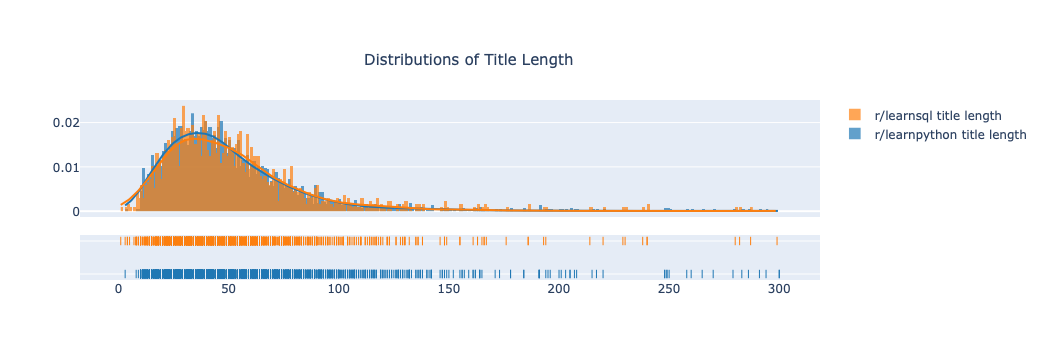

In [220]:
import plotly.figure_factory as ff

hist_data = [learnpy['title_length'], learnsql['title_length']]
group_labels = ['r/learnpython title length', 'r/learnsql title length']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[1, 1])
fig.update_layout(title_text='Distributions of Title Length', title_x=.45, title_y=.85, title_font_size=15)
fig.show()

Overall title length distributions are nearly identical for both subreddits, likely because there's the same character limit for titles imposed on both subreddits.

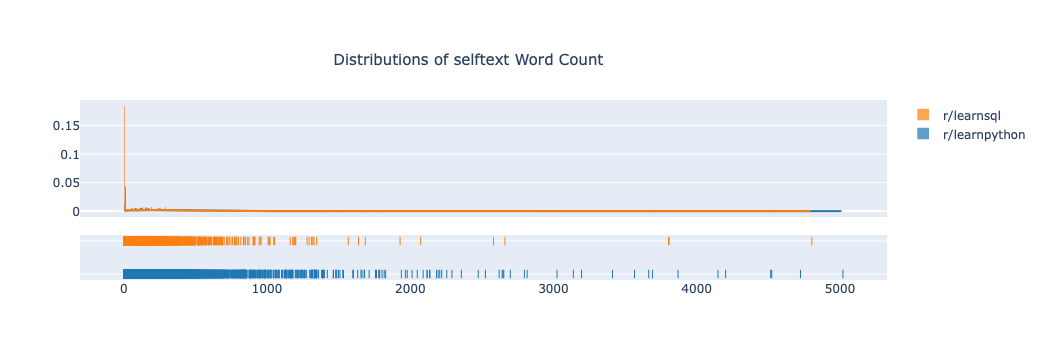

In [227]:
import plotly.figure_factory as ff

hist_data = [learnpy['post_wc'], learnsql['post_wc']]
group_labels = ['r/learnpython', 'r/learnsql']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[1, 1])
fig.update_layout(title_text='Distributions of selftext Word Count', title_x=.45, title_y=.85, title_font_size=15)
fig.show()

<img src='./images/selftext2.png'>

Word count of posts (selftext) was different. In the original data there were three posts with word count over 6000 words. Looking at these data points, it seems that people have copied and pasted code for an entire project into their reddit post. I removed entries with word count over 6000, but kept the remaining entries.

Overall, r/python had much higher mean word count for selftext. This was likely due to these outliers as well as due to a greater number of words per post on the more reasonable end of the spectrum.

In [226]:
long = learnpy[learnpy['post_wc']>6000]
learnpy = learnpy.drop(long.index)

<font color=white>.</font>

#### Count of comments

Next I looked into distibution of comment counts, and posts that had an abnormally high number of comments.

<img src='./images/py_comments.png'>

<img src='./images/sql_comments.png'>

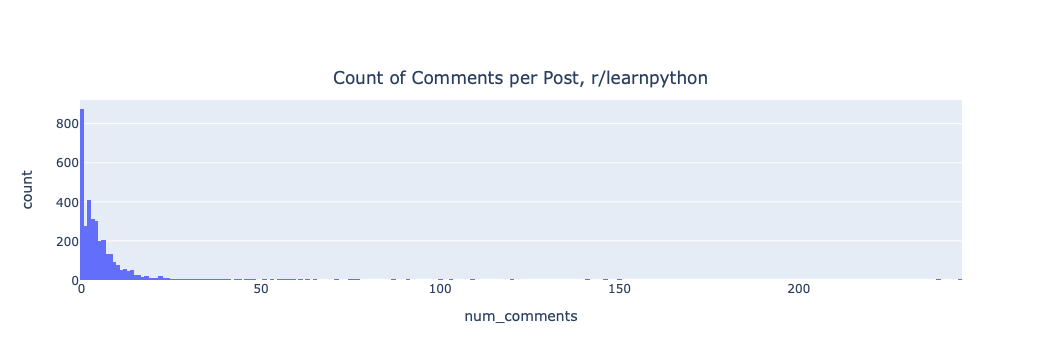

In [310]:
fig = px.histogram(
    data_frame=learnpy,
    x="num_comments",
    title="Count of Comments per Post, r/learnpython",
)
fig.update_layout(title_x=0.5, title_y=0.8)

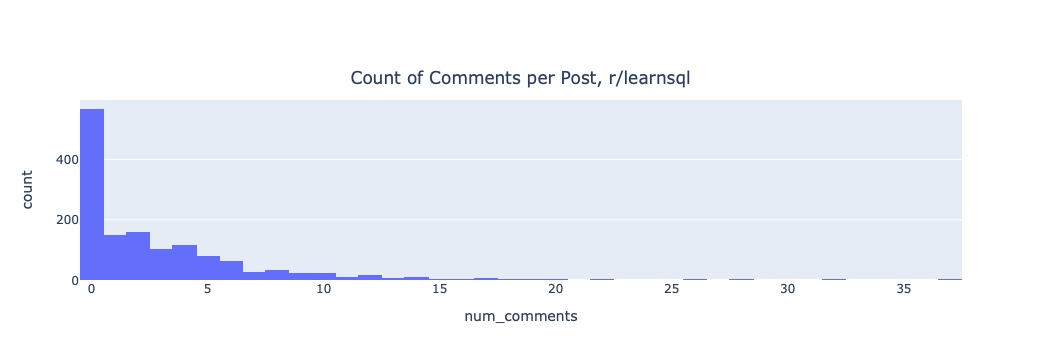

In [311]:
fig = px.histogram(
    data_frame=learnsql,
    x="num_comments",
    title="Count of Comments per Post, r/learnsql",
)
fig.update_layout(title_x=0.5, title_y=0.8)

<font color=white>.</font>

In [306]:
list(learnpy[learnpy['score']>800]['url'])

['https://www.reddit.com/r/learnpython/comments/drnc0z/automate_the_boring_stuff_free_on_udemy/']

* This post was a free resource, it had 96 comments and 1k upvotes.

<font color=white>.</font>

In [307]:
list(learnpy[learnpy['num_comments']>200]['url'])

['https://www.reddit.com/r/learnpython/comments/kosqk9/how_is_indexed_deletion_an_operator_in_python/',
 'https://www.reddit.com/r/learnpython/comments/ey9fsv/had_my_first_interview_today_and_it_sucked/']

* The first post actually did have 470 comments and 0 upvotes. It was a back and forth conversation between two users.
* The second post had 212 comments and 489 upvotes; it was a lot of users who wanted to voice their opinion on OP's interview.

In [308]:
learnpy[learnpy['num_comments']>200]['upvote_ratio']

88    1.0
43    1.0
Name: upvote_ratio, dtype: float64

The upvote ratio listed under these two posts tells me that my upvote_ratio column is probably not accurate. This may be due to reddit dropping update ratios on the website this year.

<font color=white>.</font>

#### Export cleaned data

In [228]:
learnpy.to_csv('learnpy_cleaned')
learnsql.to_csv('learnsql_cleaned')